In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

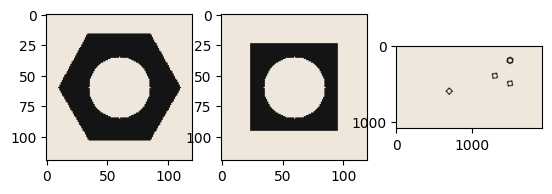

In [2]:
hexnut_template = cv.imread(r"E:\assignment 3\hexnut_template.png", cv.IMREAD_COLOR)
squarenut_template =  cv.imread(r"E:\assignment 3\squarenut_template.png", cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread(r"E:\assignment 3\conveyor_f100.png", cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

In [3]:
gray_hexnut_template = cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY)
gray_squarenut_template = cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY)
gray_conveyor_f100 = cv.cvtColor(conveyor_f100, cv.COLOR_BGR2GRAY)

Treshold value - 20.0
Treshold value - 20.0
Treshold value - 20.0


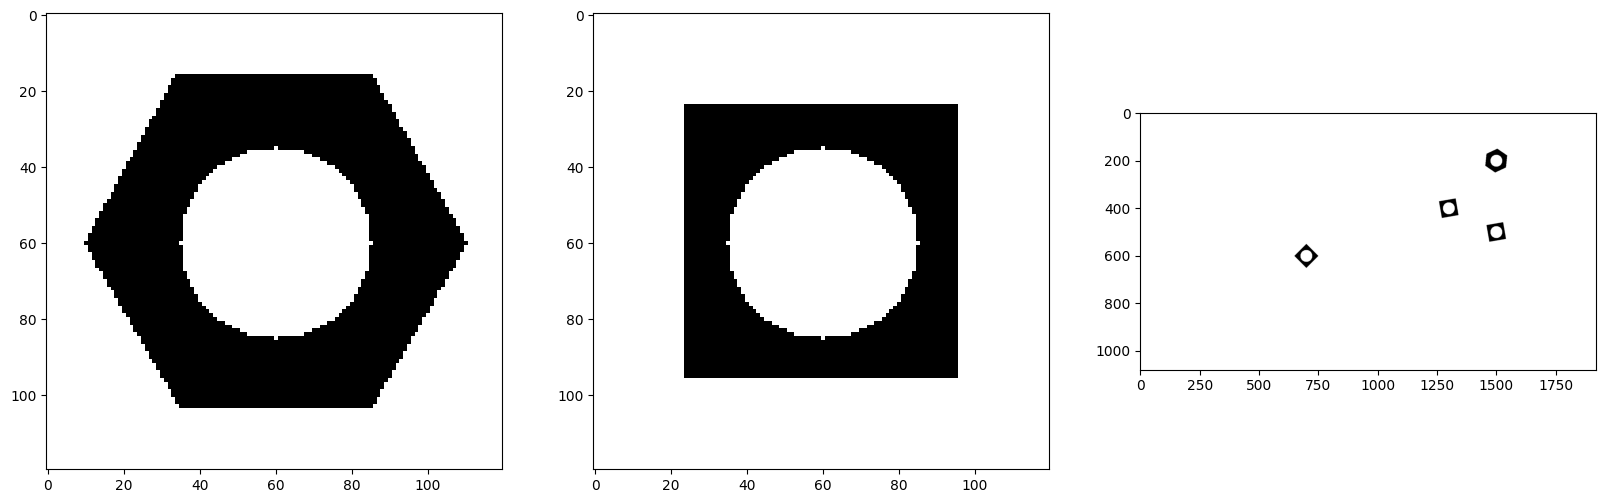

In [11]:
gray_img = [gray_hexnut_template, gray_squarenut_template, gray_conveyor_f100]
fig, ax = plt. subplots(1,3, figsize = (20, 20))

otsu_images = []
for i in range(3):
    th,im = cv.threshold(gray_img[i],0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    otsu_images.append(im)
    ax[i].imshow(cv.cvtColor(im, cv.COLOR_RGB2BGR))
    print('Treshold value -',th)
    
plt.show()

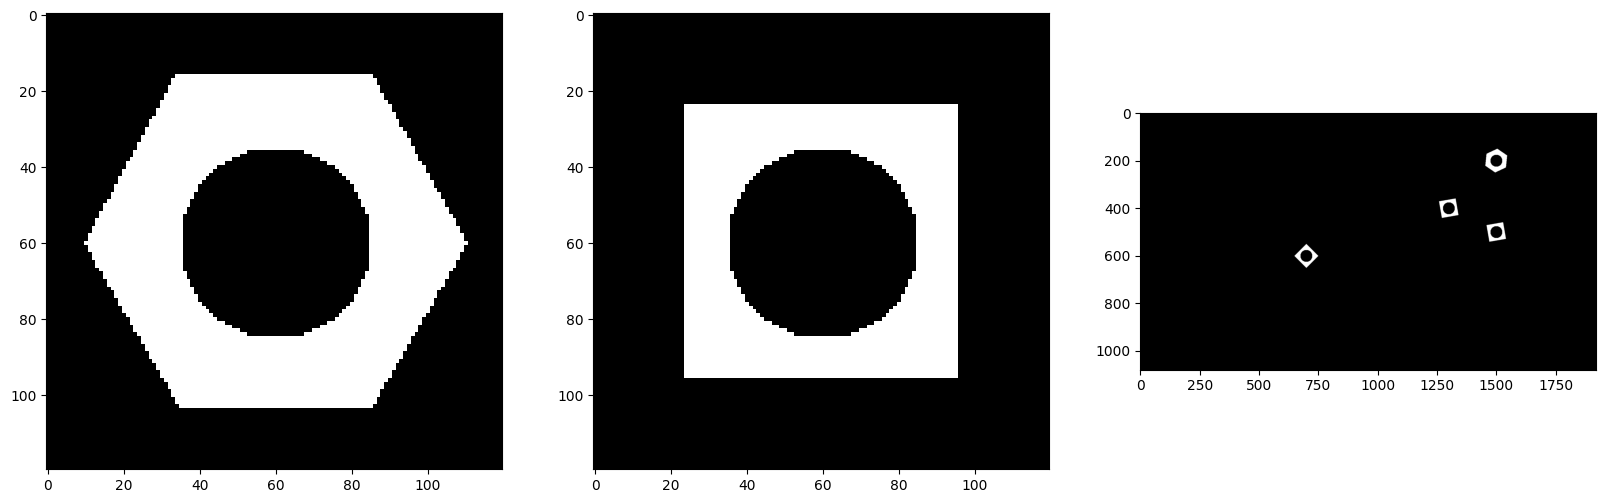

In [27]:
closing_images = []
fig, ax = plt. subplots(1,3, figsize = (20, 20))
kernel = np.ones((3,3),np.uint8)

for j in range(3):
    closing = cv.morphologyEx(np.invert(otsu_images[j]), cv.MORPH_CLOSE, kernel)
    closing_images.append(closing)
    ax[j].imshow(cv.cvtColor(closing, cv.COLOR_RGB2BGR))
    
plt.show()


Item 0 Statistics
area = 9672
Left - 0
Top - 0
Width - 120
Height - 120
Centroid - (59.33684863523573, 59.6351323407775)

Item 1 Statistics
area = 4728
Left - 10
Top - 16
Width - 101
Height - 88
Centroid - (59.83375634517766, 59.22356175972927)


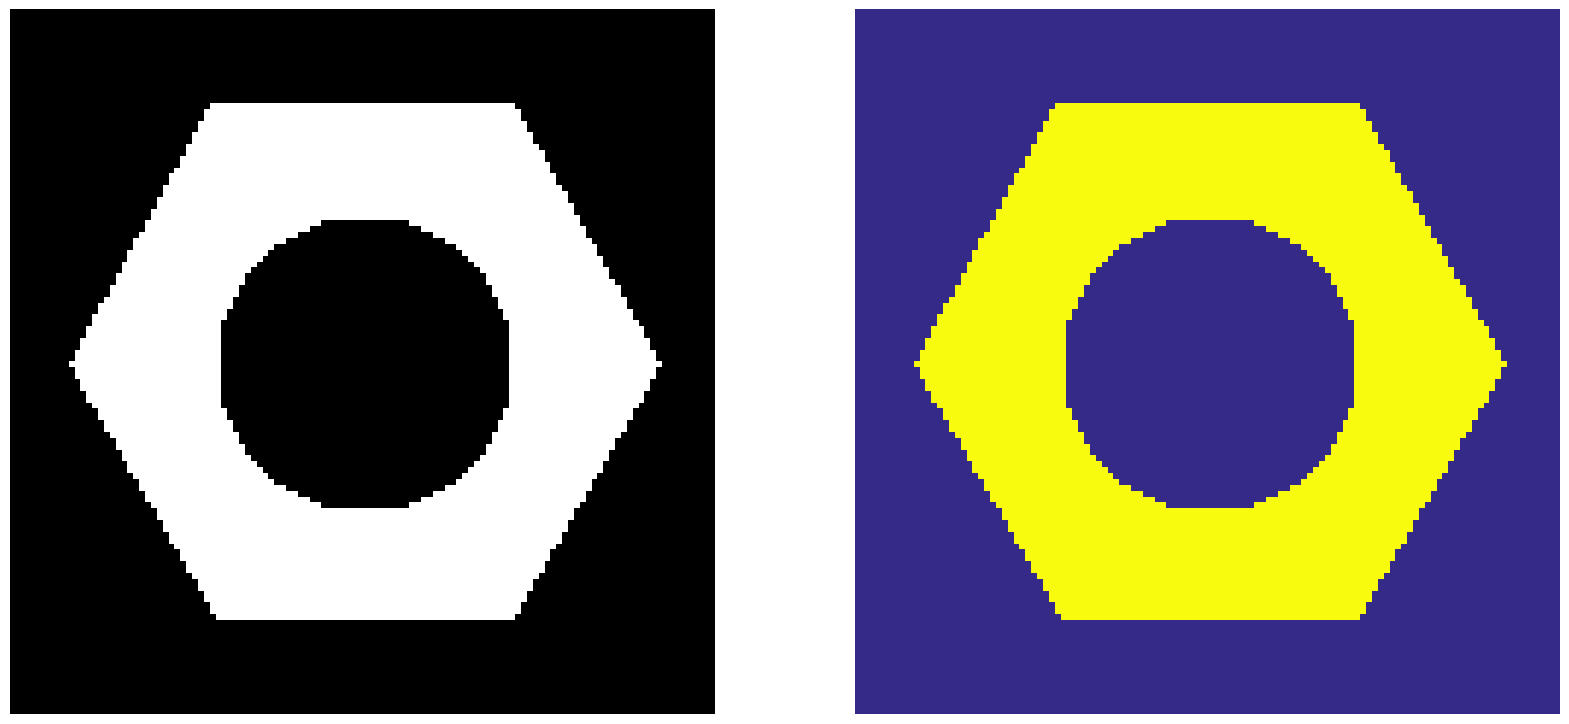


Item 0 Statistics
area = 11173
Left - 0
Top - 0
Width - 120
Height - 120
Centroid - (59.58757719502372, 59.58757719502372)

Item 1 Statistics
area = 3227
Left - 24
Top - 24
Width - 72
Height - 72
Centroid - (59.196777192438795, 59.196777192438795)


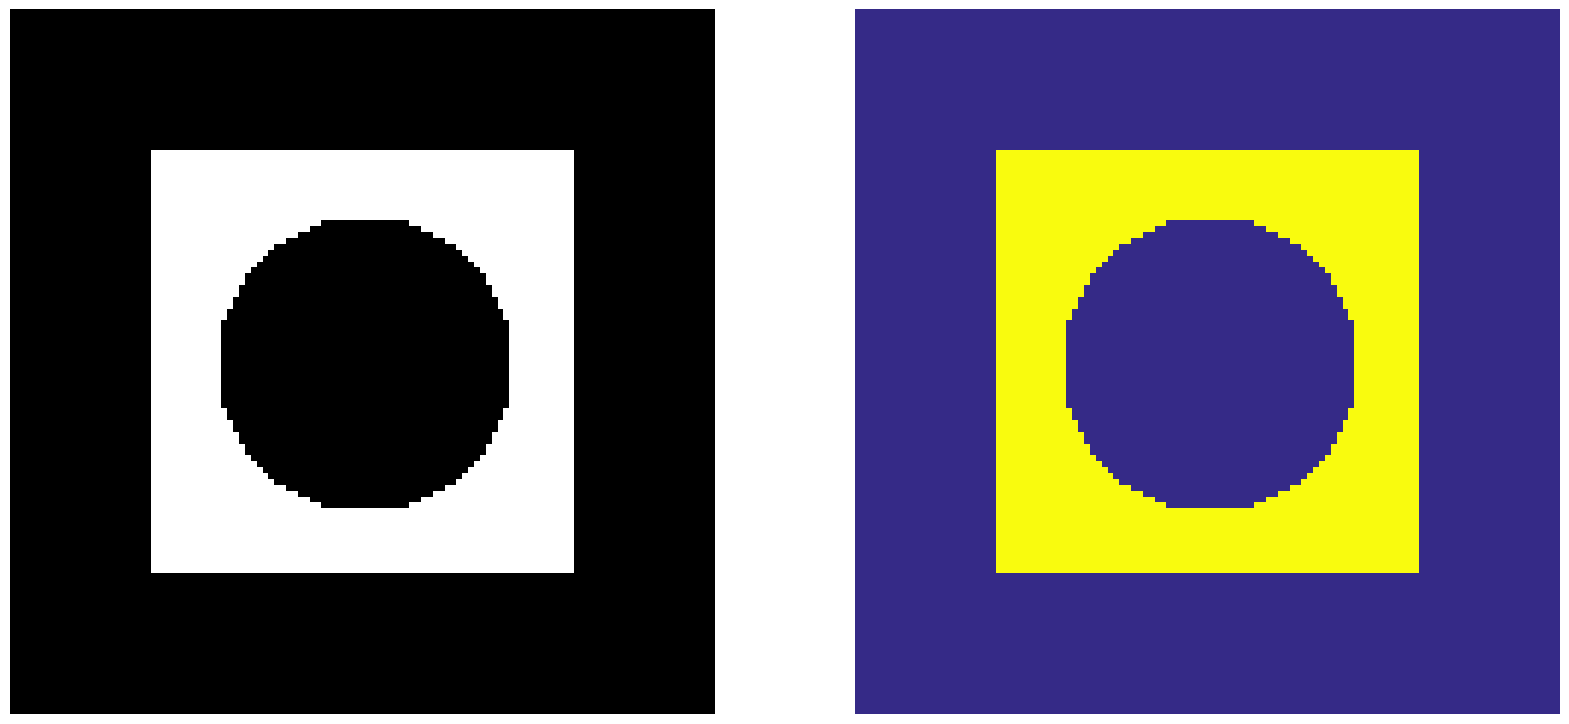


Item 0 Statistics
area = 2059646
Left - 0
Top - 0
Width - 1920
Height - 1080
Centroid - (957.3632352355696, 540.4441627347612)

Item 1 Statistics
area = 4636
Left - 1454
Top - 150
Width - 92
Height - 100
Centroid - (1499.2420189818808, 199.28515962036238)

Item 2 Statistics
area = 3087
Left - 1259
Top - 359
Width - 82
Height - 82
Centroid - (1299.1830255911889, 399.1830255911889)

Item 3 Statistics
area = 3087
Left - 1459
Top - 459
Width - 82
Height - 82
Centroid - (1499.1830255911889, 499.1830255911889)

Item 4 Statistics
area = 3144
Left - 650
Top - 550
Width - 101
Height - 101
Centroid - (700.0, 600.0)


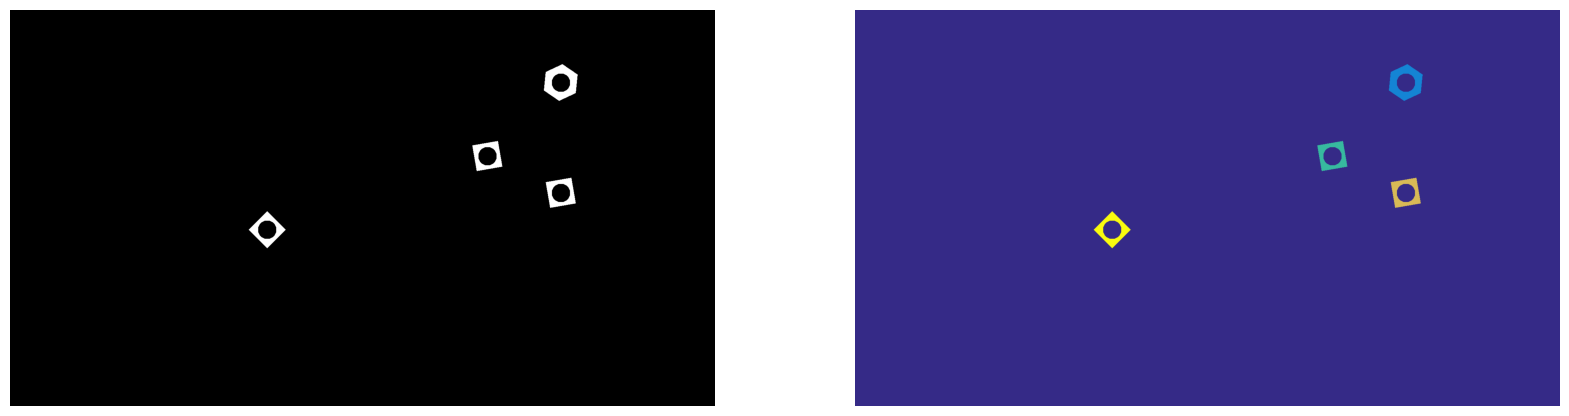

In [29]:
for k in range(3):
    
    retval,labels,stats,centroides = cv.connectedComponentsWithStats(closing_images[k], 4, cv.CV_32S)
    colormapped = cv.applyColorMap((labels/np.amax(labels)*255).astype("uint8"),cv.COLORMAP_PARULA)
    
    for i in range(retval):

        area = stats[i, cv.CC_STAT_AREA]
        x = stats[i, cv.CC_STAT_LEFT]
        y = stats[i, cv.CC_STAT_TOP]
        w = stats[i, cv.CC_STAT_WIDTH]
        h = stats[i, cv.CC_STAT_HEIGHT]
        (C1, C2) = centroides[i]

        print("\nItem",i,"Statistics")
        print("area =",area)
        print("Left -",x)
        print("Top -",y)
        print("Width -",w)
        print("Height -",h)
        print("Centroid -",(C1, C2))
    
                           
    fig, ax = plt. subplots(1,2, figsize = (20, 20))
    ax[0].imshow(cv.cvtColor(closing_images[k], cv.COLOR_BGR2RGB))
    ax[0].axis('off')
    ax[1].imshow(cv.cvtColor(colormapped, cv.COLOR_BGR2RGB))
    ax[1].axis('off')
    plt.show()

In [14]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture("E:\assignment 3\conveyor.mp4")
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()